In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load aggregated network table joined with the revenue table
Q4 = pd.read_csv('q4_fin_network_rev_v2.csv')

In [5]:
pd.options.display.max_columns = 50

## Subset Q4 to ensure "No Certainty" in the Model
* 100% aval_flights_percent will for sure contribute to 100% of passenger_percent 
* If there is a certainty in model, there will be data leakage and it will increase the that coefficient incorrectly
* Remove 'Aval_Flights_percent' equal to 100% or 0% 

In [6]:
Q4 = Q4[(Q4['Aval_Flights_percent'] != 1) & (Q4['Aval_Flights_percent'] != 0) &
        (Q4['Aval_Seats_percent'] != 1) & (Q4['Aval_Seats_percent'] != 0) &
        (Q4['rev_percent'] != 1) & (Q4['rev_percent'] != 0) &
        (Q4['passenger_percent'] != 1) & (Q4['passenger_percent'] != 0)] 

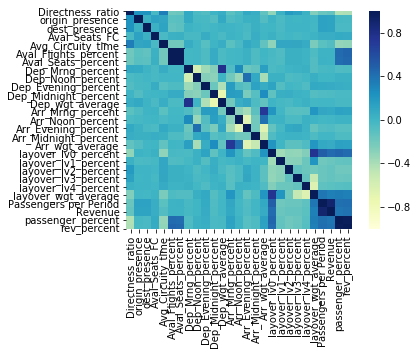

In [7]:
# plot correlation matrix using seaborn

df_corr = Q4.corr()
sns.heatmap(df_corr, 
    xticklabels=df_corr.columns.values, # x-axis values are the column names
    yticklabels=df_corr.columns.values, # y-axis labels are the column names
    vmin=-1, # minimum value is -1
    vmax=1, # maximum value is 1
    center=0, # centering around 0 for the color switchover
    cmap="YlGnBu", # color palette
    square=True) # ensures the seaborn heatmap is composed of squares

## Examine the distributions of each feature.
Test out square, square root and log transformations to normalize features.

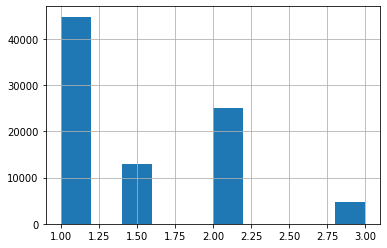

In [8]:
Q4['Directness_ratio'].hist()

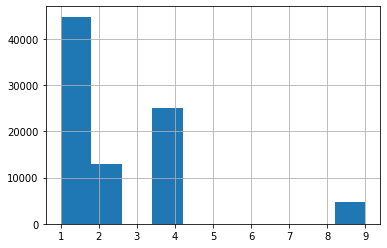

In [9]:
Q4['Directness_ratio_sq'] = Q4['Directness_ratio']**2
Q4['Directness_ratio_sq_log'] = np.log(Q4['Directness_ratio_sq'])
Q4['Directness_ratio_sq'].hist()

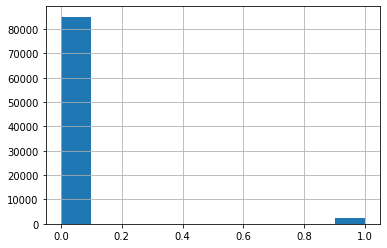

In [10]:
Q4['Aval_Seats_FC'].hist()

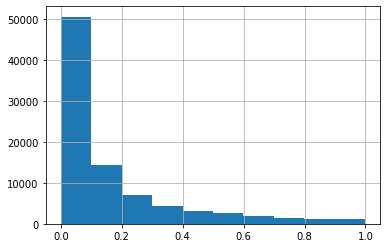

In [11]:
Q4['Aval_Flights_percent'].hist()

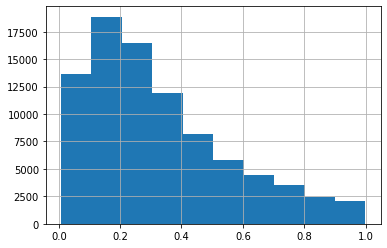

In [12]:
Q4['Aval_Flights_percent_sq'] = Q4['Aval_Flights_percent']**2
Q4['Aval_Flights_percent_sqrt'] = np.sqrt(Q4['Aval_Flights_percent'])
Q4['Aval_Flights_percent_sqrt'].hist()

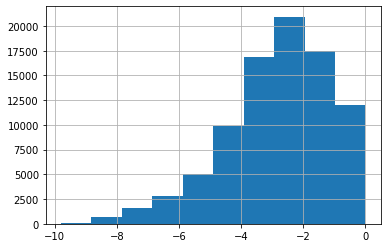

In [13]:
Q4['Aval_Flights_percent_log'] = np.log(Q4['Aval_Flights_percent'])
Q4['Aval_Flights_percent_log'].hist()

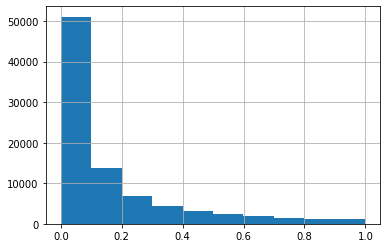

In [14]:
Q4['Aval_Seats_percent'].hist()

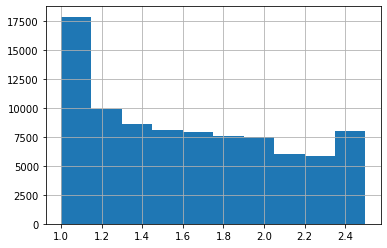

In [15]:
Q4['Avg_Circuity_time'].hist()

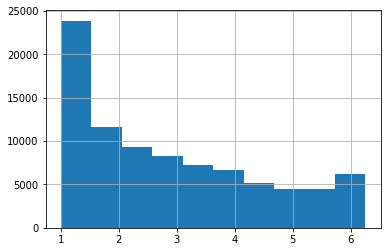

In [16]:
Q4['Avg_Circuity_time_sq'] = Q4['Avg_Circuity_time']**2
Q4['Avg_Circuity_time_sq_log'] = np.log(Q4['Avg_Circuity_time_sq'])
Q4['Avg_Circuity_time_sq'].hist()

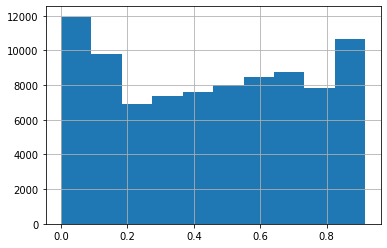

In [17]:
Q4['Avg_Circuity_time_log'] = np.log(Q4['Avg_Circuity_time'])
Q4['Avg_Circuity_time_log'].hist()

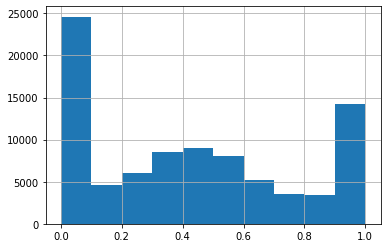

In [18]:
Q4['Dep_Mrng_percent'].hist()

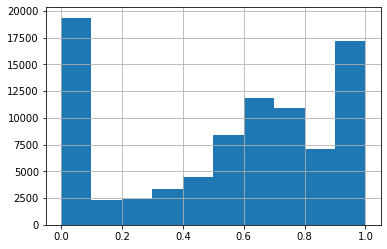

In [19]:
Q4['Dep_Mrng_percent_sq'] = Q4['Dep_Mrng_percent']**2
Q4['Dep_Mrng_percent_sqrt'] = np.sqrt(Q4['Dep_Mrng_percent'])
Q4['Dep_Mrng_percent_sqrt'].hist()

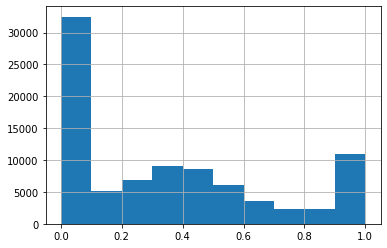

In [20]:
Q4['Dep_Noon_percent'].hist()

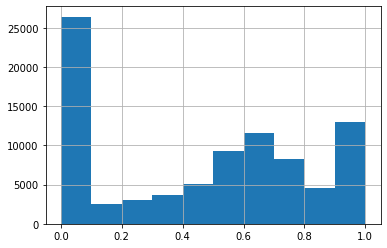

In [21]:
Q4['Dep_Noon_percent_sq'] = Q4['Dep_Noon_percent']**2
Q4['Dep_Noon_percent_sqrt'] = np.sqrt(Q4['Dep_Noon_percent'])
Q4['Dep_Noon_percent_sqrt'].hist()

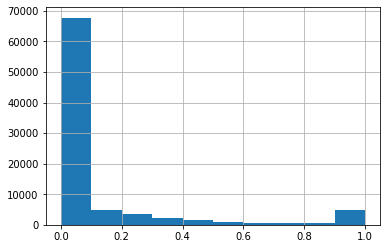

In [22]:
Q4['Dep_Evening_percent'].hist()

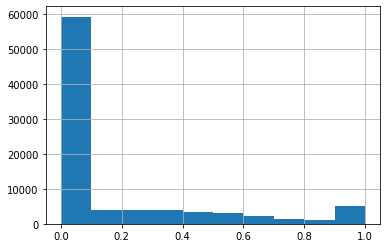

In [23]:
Q4['Dep_Evening_percent_sq'] = Q4['Dep_Evening_percent']**2
Q4['Dep_Evening_percent_sqrt'] = np.sqrt(Q4['Dep_Evening_percent'])
Q4['Dep_Evening_percent_sqrt'].hist()

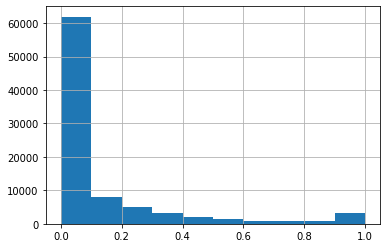

In [24]:
Q4['Dep_Midnight_percent'].hist()

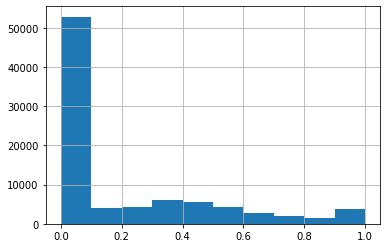

In [25]:
Q4['Dep_Midnight_percent_sq'] = Q4['Dep_Midnight_percent']**2
Q4['Dep_Midnight_percent_sqrt'] = np.sqrt(Q4['Dep_Midnight_percent'])
Q4['Dep_Midnight_percent_sqrt'].hist()

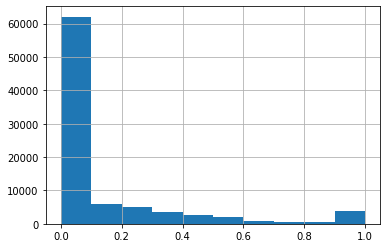

In [26]:
Q4['Arr_Mrng_percent'].hist()

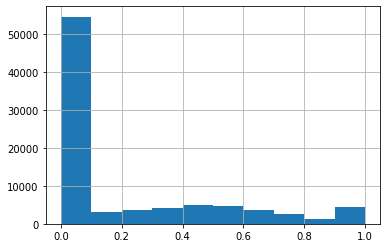

In [27]:
Q4['Arr_Mrng_percent_sq'] = Q4['Arr_Mrng_percent']**2
Q4['Arr_Mrng_percent_sqrt'] = np.sqrt(Q4['Arr_Mrng_percent'])
Q4['Arr_Mrng_percent_sqrt'].hist()

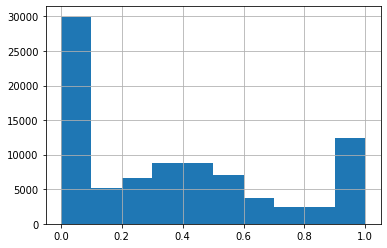

In [28]:
Q4['Arr_Noon_percent'].hist()

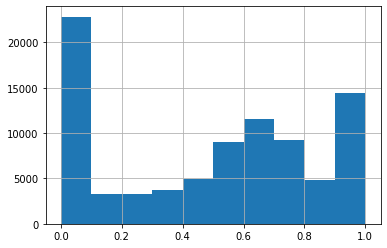

In [29]:
Q4['Arr_Noon_percent_sq'] = Q4['Arr_Noon_percent']**2
Q4['Arr_Noon_percent_sqrt'] = np.sqrt(Q4['Arr_Noon_percent'])
Q4['Arr_Noon_percent_sqrt'].hist()

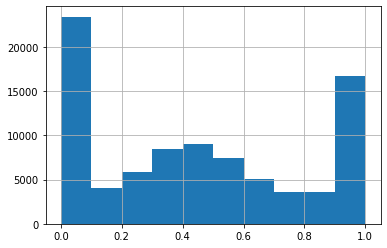

In [30]:
Q4['Arr_Evening_percent'].hist()

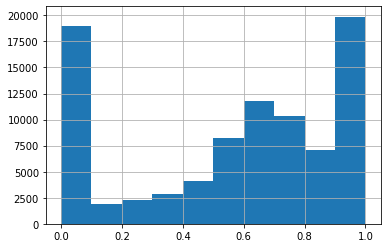

In [31]:
Q4['Arr_Evening_percent_sq'] = Q4['Arr_Evening_percent']**2
Q4['Arr_Evening_percent_sqrt'] = np.sqrt(Q4['Arr_Evening_percent'])
Q4['Arr_Evening_percent_sqrt'].hist()

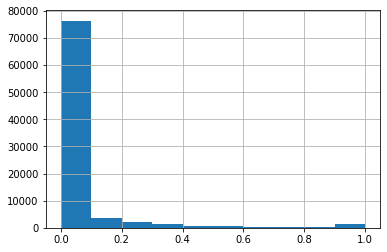

In [32]:
Q4['Arr_Midnight_percent'].hist()

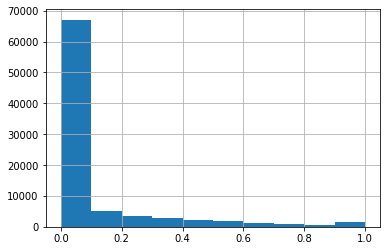

In [33]:
Q4['Arr_Midnight_percent_sq'] = Q4['Arr_Midnight_percent']**2
Q4['Arr_Midnight_percent_sqrt'] = np.sqrt(Q4['Arr_Midnight_percent'])
Q4['Arr_Midnight_percent_sqrt'].hist()

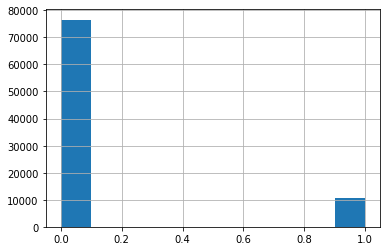

In [34]:
Q4['layover_lv0_percent'].hist()

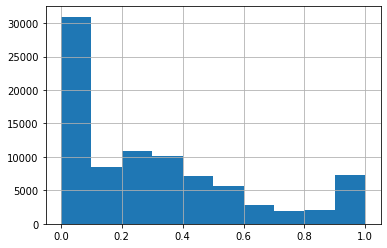

In [35]:
Q4['layover_lv1_percent'].hist()

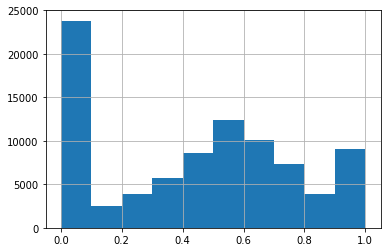

In [36]:
Q4['layover_lv1_percent_sq'] = Q4['layover_lv1_percent']**2
Q4['layover_lv1_percent_sqrt'] = np.sqrt(Q4['layover_lv1_percent'])
Q4['layover_lv1_percent_sqrt'].hist()

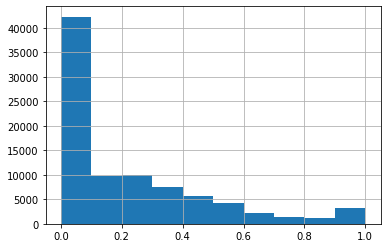

In [37]:
Q4['layover_lv2_percent'].hist()

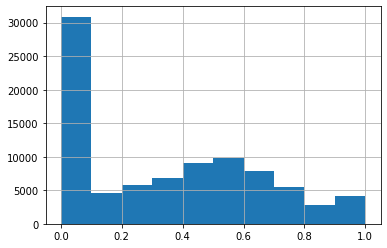

In [38]:
Q4['layover_lv2_percent_sq'] = Q4['layover_lv2_percent']**2
Q4['layover_lv2_percent_sqrt'] = np.sqrt(Q4['layover_lv2_percent'])
Q4['layover_lv2_percent_sqrt'].hist()

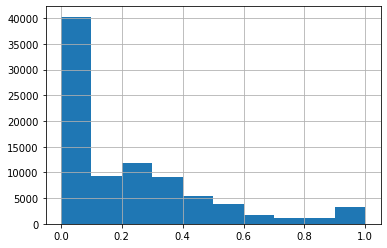

In [39]:
Q4['layover_lv3_percent'].hist()

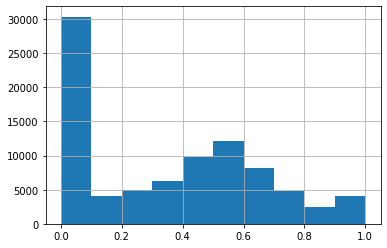

In [40]:
Q4['layover_lv3_percent_sq'] = Q4['layover_lv3_percent']**2
Q4['layover_lv3_percent_sqrt'] = np.sqrt(Q4['layover_lv3_percent'])
Q4['layover_lv3_percent_sqrt'].hist()

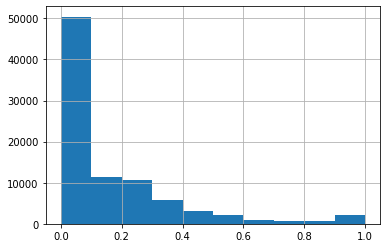

In [41]:
Q4['layover_lv4_percent'].hist()

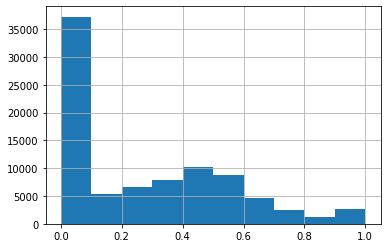

In [42]:
Q4['layover_lv4_percent_sq'] = Q4['layover_lv4_percent']**2
Q4['layover_lv4_percent_sqrt'] = np.sqrt(Q4['layover_lv4_percent'])
Q4['layover_lv4_percent_sqrt'].hist()

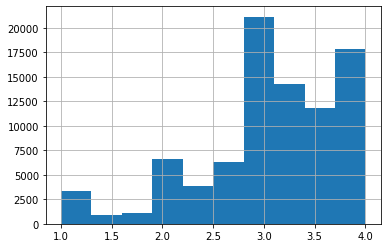

In [43]:
Q4['Dep_wgt_average'].hist()

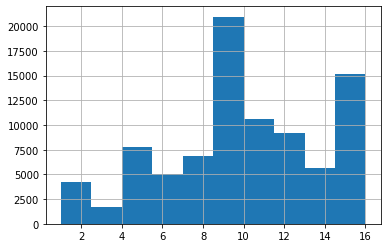

In [44]:
Q4['Dep_wgt_average_sq'] = Q4['Dep_wgt_average']**2
Q4['Dep_wgt_average_sqrt'] = np.sqrt(Q4['Dep_wgt_average'])
Q4['Dep_wgt_average_sq'].hist()

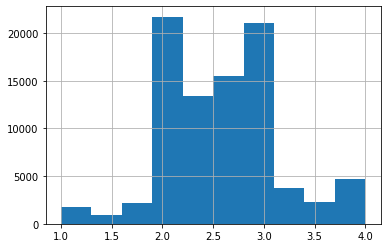

In [45]:
Q4['Arr_wgt_average'].hist()

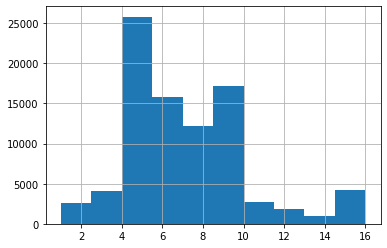

In [46]:
Q4['Arr_wgt_average_sq'] = Q4['Arr_wgt_average']**2
Q4['Arr_wgt_average_sqrt'] = np.sqrt(Q4['Arr_wgt_average'])
Q4['Arr_wgt_average_sq'].hist()

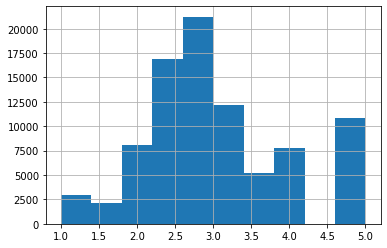

In [47]:
Q4['layover_wgt_average'].hist()

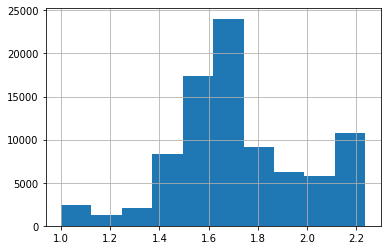

In [48]:
Q4['layover_wgt_average_sq'] = Q4['layover_wgt_average']**2
Q4['layover_wgt_average_sqrt'] = np.sqrt(Q4['layover_wgt_average'])
Q4['layover_wgt_average_sqrt'].hist()

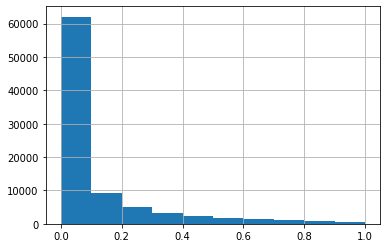

In [49]:
Q4['rev_percent'].hist()

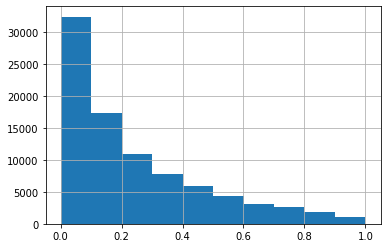

In [50]:
Q4['rev_percent_sq'] = Q4['rev_percent']**2
Q4['rev_percent_sqrt'] = np.sqrt(Q4['rev_percent'])
Q4['rev_percent_sqrt'].hist()

## Creating a QSI Model for Percent of Revenue

### Method 1a: Creating a QSI model using the percentage columns with linear regression and Ridge regression

In [51]:
# eliminate any features with high multicolinearity
features_percent = [
 'Directness_ratio',
 'origin_presence',
 'dest_presence',
 'Aval_Seats_FC',
 'Avg_Circuity_time',
 'Aval_Flights_percent',
 #'Aval_Seats_percent',
 'Dep_Mrng_percent',
 'Dep_Noon_percent',
 'Dep_Evening_percent',
 'Dep_Midnight_percent',
 'Arr_Mrng_percent',
 'Arr_Noon_percent',
 'Arr_Evening_percent',
 'Arr_Midnight_percent',
 'layover_lv0_percent',
 'layover_lv1_percent',
 'layover_lv2_percent',
 'layover_lv3_percent',
 'layover_lv4_percent'
]

In [52]:
X = Q4[features_percent]
y = Q4['rev_percent']

In [53]:
# Make train/test splits of the right size.
X_train_and_validation, X_test, y_train_and_validation, y_test  =  train_test_split(X, y, test_size = 0.2, random_state = 6) # test set is 20%
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.1, random_state = 6) # validation set is 10% of the total data (not 10% of X_train_and_validation)
print(X_train.shape, X_val.shape, X_test.shape)

(78594, 19) (8733, 19) (17466, 19)


In [54]:
# use statsmodel to get a print out summary of the model similar to R
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

C:\Users\annam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:            rev_percent   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     4735.
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        20:27:16   Log-Likelihood:                 51388.
No. Observations:               87327   AIC:                        -1.027e+05
Df Residuals:                   87310   BIC:                        -1.026e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1116 

In [55]:
#retrain to eliminate variables with p-values > 0.05
features_percent = [
 'Directness_ratio',
 'origin_presence',
 'dest_presence',
 'Aval_Seats_FC',
 'Avg_Circuity_time',
 'Aval_Flights_percent',
 #'Aval_Seats_percent',
 'Dep_Mrng_percent',
 'Dep_Noon_percent',
 'Dep_Evening_percent',
 #'Dep_Midnight_percent',
 'Arr_Mrng_percent',
 'Arr_Noon_percent',
 #'Arr_Evening_percent',
 'Arr_Midnight_percent',
 'layover_lv0_percent',
 'layover_lv1_percent',
 'layover_lv2_percent',
 'layover_lv3_percent',
 'layover_lv4_percent'
]

X_v2 = Q4[features_percent]
y_v2 = Q4['rev_percent']

# Make train/test splits of the right size.
X_train_and_validation, X_test, y_train_and_validation, y_test  =  train_test_split(X_v2, y_v2, test_size = 0.2, random_state = 6) # test set is 20%
X_train, X_val, y_train, y_val = train_test_split(X_v2,y_v2, test_size = 0.1, random_state = 6) # validation set is 10% of the total data (not 10% of X_train_and_validation)
print(X_train.shape, X_val.shape, X_test.shape)

(78594, 17) (8733, 17) (17466, 17)


In [56]:
X2_v2 = sm.add_constant(X_v2)
est = sm.OLS(y_v2, X2_v2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            rev_percent   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     4735.
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        20:27:17   Log-Likelihood:                 51388.
No. Observations:               87327   AIC:                        -1.027e+05
Df Residuals:                   87310   BIC:                        -1.026e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1313 

In [57]:
# Use SKLearn to check the MSE
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
df = pd.DataFrame(y_test)
df['y_pred'] = y_pred

## mean square error
MSE = mean_squared_error(df['rev_percent'], df['y_pred'])

print(MSE)

0.01749035789012266


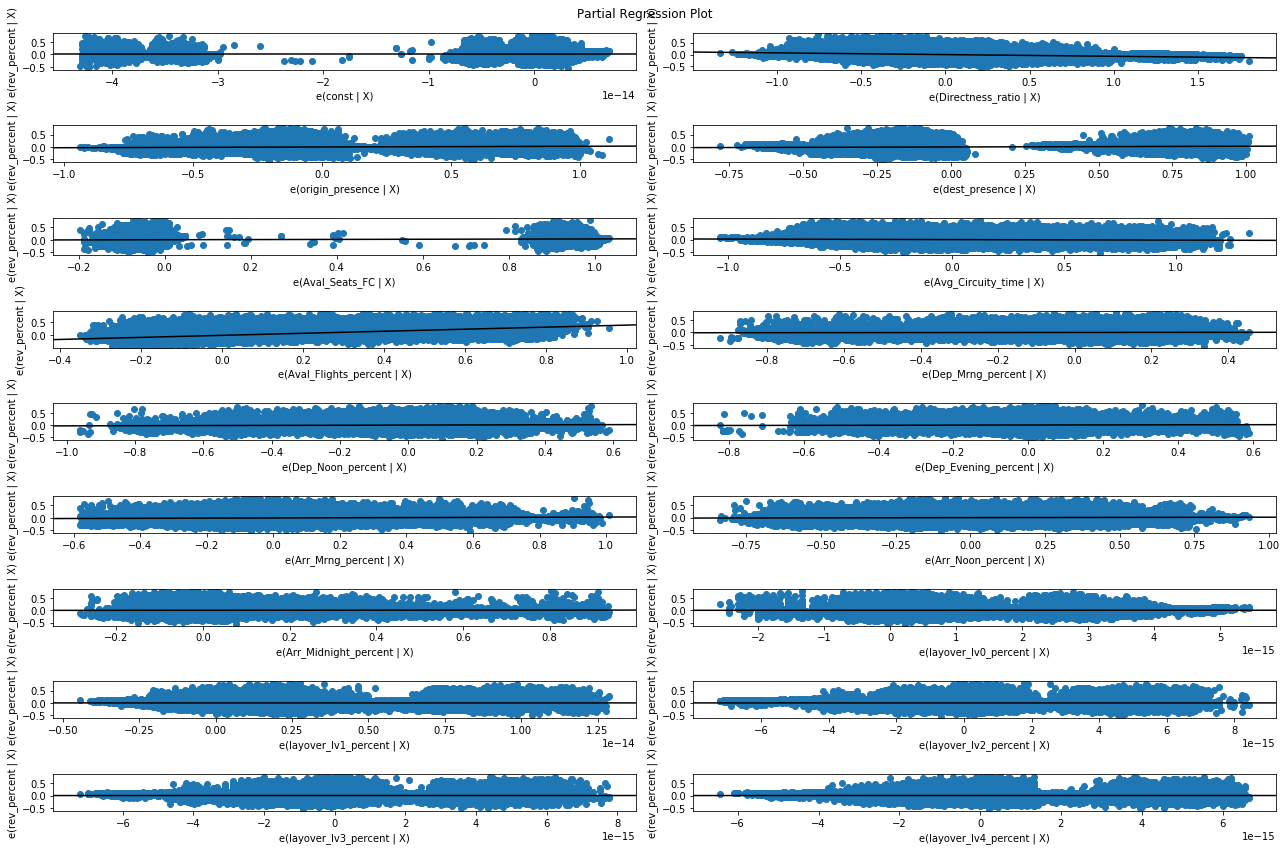

In [58]:
# look at the residual plots
fig = plt.figure(figsize=(18,12))
fig = sm.graphics.plot_partregress_grid(est2, fig=fig)

In [59]:
! pip install yellowbrick

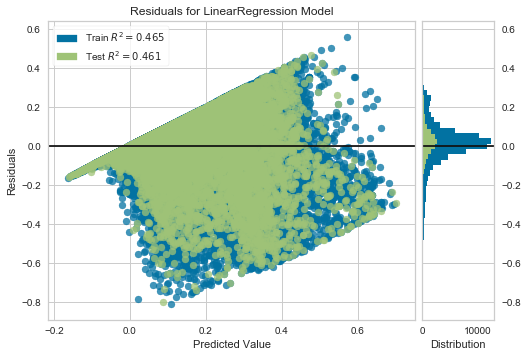

In [60]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

### Ridge regression

In [61]:
# Ridge models assume input features are standardized
# enough of the input variables have what appears to be an exponential distribution, so standardizing 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
y_train = y_train - np.mean(y_train)

X_test = scaler.transform(X_test)
y_test = y_test - np.mean(y_train)

X_val = scaler.transform(X_val)
y_val = y_val 

In [62]:
# Ridge regression
l2_penalties = np.logspace(-5, 5, 11)
ridge_data = []

for l2_penalty in l2_penalties:
    print(l2_penalty)
    model2 = Ridge(alpha = l2_penalty)

    rdg = model2.fit(X_train, y_train)
    y_train_predict = rdg.predict(X_train)
    y_val_predict = rdg.predict(X_val)

    train_error = mean_squared_error(y_train, y_train_predict) # TODO: compute MSE on the training set
    val_error = mean_squared_error(y_val, y_val_predict) # TODO: compute MSE on the validation set

    
    # We maintain a list of dictionaries containing our results
    ridge_data.append({
        'l2_penalty': l2_penalty,
        'model': rdg,
        'train_mse': train_error,
        'validation_mse': val_error})
    
ridge_data = pd.DataFrame(ridge_data) # We will put this data into a datframe to make it easier to use later.
print(ridge_data)

1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
      l2_penalty                                              model  \
0        0.00001  Ridge(alpha=1e-05, copy_X=True, fit_intercept=...   
1        0.00010  Ridge(alpha=0.0001, copy_X=True, fit_intercept...   
2        0.00100  Ridge(alpha=0.001, copy_X=True, fit_intercept=...   
3        0.01000  Ridge(alpha=0.01, copy_X=True, fit_intercept=T...   
4        0.10000  Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...   
5        1.00000  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...   
6       10.00000  Ridge(alpha=10.0, copy_X=True, fit_intercept=T...   
7      100.00000  Ridge(alpha=100.0, copy_X=True, fit_intercept=...   
8     1000.00000  Ridge(alpha=1000.0, copy_X=True, fit_intercept...   
9    10000.00000  Ridge(alpha=10000.0, copy_X=True, fit_intercep...   
10  100000.00000  Ridge(alpha=100000.0, copy_X=True, fit_interce...   

    train_mse  validation_mse  
0    0.018085        0.029616  
1    0.018085   

In [63]:
# sanity check
assert type(ridge_data) == pd.DataFrame
assert len(ridge_data) == 11

for col in ['l2_penalty', 'model', 'train_mse', 'validation_mse']:
    assert col in ridge_data.columns, f'Missing column {col}'

In [64]:
def print_coefficients(model, features):
    """
    This function takes in a model column and a features column. 
    And prints the coefficient along with its feature name.
    """
    feats = list(zip(model.coef_, features))
    print(*feats, sep = "\n")

In [65]:
# Reruning Ridge model using best l2-penalty value identified

index = ridge_data['validation_mse'].idxmin()

best_ridge = ridge_data.loc[index]

ridge_model = Ridge(alpha = best_ridge['l2_penalty']).fit(X_train, y_train)

y_predict2 = ridge_model.predict(X_test)
test_error2 = mean_squared_error(y_test, y_predict2)

print('Best L2 Penalty', best_ridge['l2_penalty'])
print('TEST MSE', test_error2)
print_coefficients(best_ridge['model'], features_percent)

Best L2 Penalty 1e-05
TEST MSE 0.02921665700420732
(-0.0404966700687422, 'Directness_ratio')
(0.012788155295121038, 'origin_presence')
(0.01302517121561466, 'dest_presence')
(0.005186607505916018, 'Aval_Seats_FC')
(-0.00955260096326713, 'Avg_Circuity_time')
(0.07961921592479834, 'Aval_Flights_percent')
(0.003683631978524288, 'Dep_Mrng_percent')
(0.010369587920737746, 'Dep_Noon_percent')
(0.005463595659722046, 'Dep_Evening_percent')
(0.009280596757538624, 'Arr_Mrng_percent')
(0.006559710108204125, 'Arr_Noon_percent')
(0.0014264670731838401, 'Arr_Midnight_percent')
(0.045347785409514396, 'layover_lv0_percent')
(-0.011475957062667156, 'layover_lv1_percent')
(-0.01948869791366336, 'layover_lv2_percent')
(-0.01691335800390057, 'layover_lv3_percent')
(-0.009704268759424251, 'layover_lv4_percent')


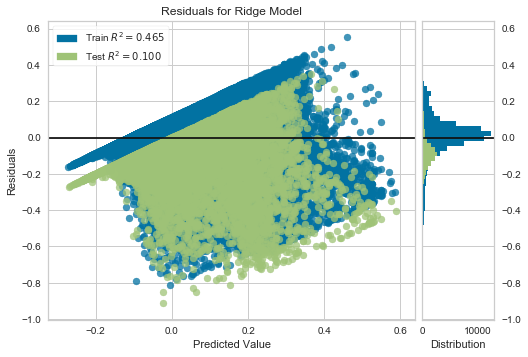

In [66]:
# Instantiate the Ridge model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

## Method 1b: Square root transformation of variables
Rerun linear regression and ridge regression using the transformed inputs (square root transformation)

In [67]:
features_transformed_percent = [
 'Directness_ratio_sq',
 'origin_presence',
 'dest_presence',
 'Avg_Circuity_time_sq',
 'Aval_Seats_FC',
 'Aval_Flights_percent_sqrt',
 'Dep_Mrng_percent_sqrt',
 'Dep_Noon_percent_sqrt',
 'Dep_Evening_percent_sqrt',
 'Dep_Midnight_percent_sqrt',
 'Arr_Mrng_percent_sqrt',
 'Arr_Noon_percent_sqrt',
 'Arr_Evening_percent_sqrt',
 'Arr_Midnight_percent_sqrt',
 'layover_lv0_percent',
 'layover_lv1_percent_sqrt',
 'layover_lv2_percent_sqrt',
 'layover_lv3_percent_sqrt',
 'layover_lv4_percent_sqrt',
]

X = Q4[features_transformed_percent]
y = Q4['rev_percent']

# Make train/test splits of the right size.
X_train_and_validation, X_test, y_train_and_validation, y_test  =  train_test_split(X, y, test_size = 0.2, random_state = 6) # test set is 20%
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.1, random_state = 6) # validation set is 10% of the total data (not 10% of X_train_and_validation)
print(X_train.shape, X_val.shape, X_test.shape)

(78594, 19) (8733, 19) (17466, 19)


In [68]:
# use statsmodel to get a print out summary of the model similar to R
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

C:\Users\annam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:            rev_percent   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     4141.
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        20:27:40   Log-Likelihood:                 52165.
No. Observations:               87327   AIC:                        -1.043e+05
Df Residuals:                   87307   BIC:                        -1.041e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

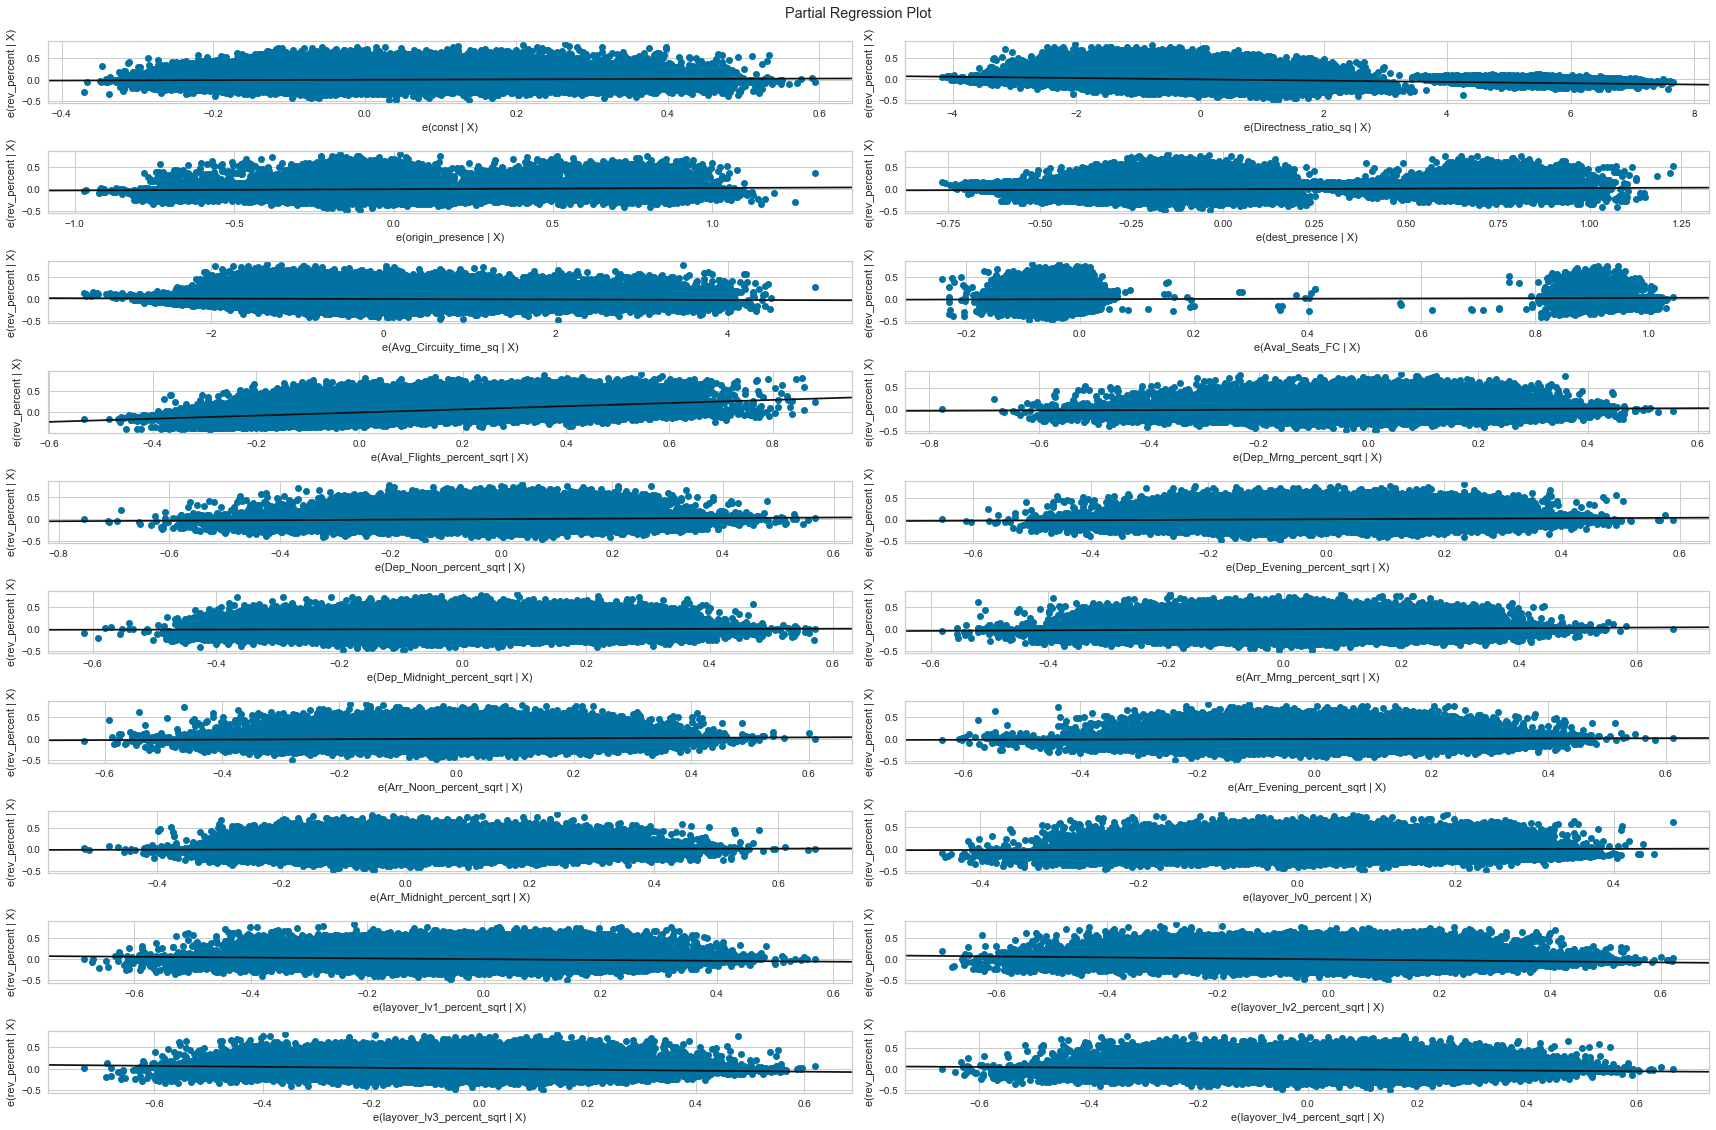

In [69]:
# look at the residual plots
fig = plt.figure(figsize=(24,16))
fig = sm.graphics.plot_partregress_grid(est2, fig=fig)

In [70]:
# Use SKLearn to check the MSE
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
df = pd.DataFrame(y_test)
df['y_pred'] = y_pred

## mean square error
MSE = mean_squared_error(df['rev_percent'], df['y_pred'])

print(MSE)

0.017184527420732728


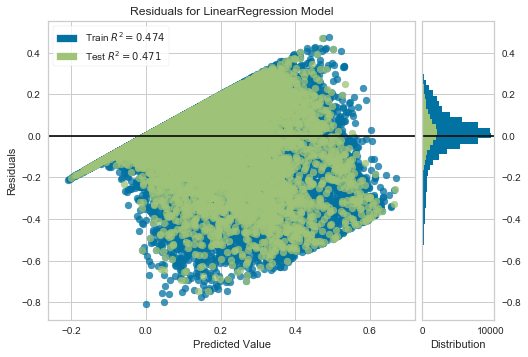

In [71]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Instantiate the Ridge model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

In [72]:
# Ridge models assume input features are standardized
# enough of the input variables have what appears to be an exponential distribution, so standardizing 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
y_train = y_train - np.mean(y_train)

X_test = scaler.transform(X_test)
y_test = y_test - np.mean(y_train)

X_val = scaler.transform(X_val)
y_val = y_val 

In [73]:
# Ridge regression
l2_penalties = np.logspace(-5, 5, 11)
ridge_data = []

for l2_penalty in l2_penalties:
    print(l2_penalty)
    model2 = Ridge(alpha = l2_penalty)

    rdg = model2.fit(X_train, y_train)
    y_train_predict = rdg.predict(X_train)
    y_val_predict = rdg.predict(X_val)

    train_error = mean_squared_error(y_train, y_train_predict) # TODO: compute MSE on the training set
    val_error = mean_squared_error(y_val, y_val_predict) # TODO: compute MSE on the validation set

    
    # We maintain a list of dictionaries containing our results
    ridge_data.append({
        'l2_penalty': l2_penalty,
        'model': rdg,
        'train_mse': train_error,
        'validation_mse': val_error})
    
ridge_data = pd.DataFrame(ridge_data) # We will put this data into a datframe to make it easier to use later.
print(ridge_data)

1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
      l2_penalty                                              model  \
0        0.00001  Ridge(alpha=1e-05, copy_X=True, fit_intercept=...   
1        0.00010  Ridge(alpha=0.0001, copy_X=True, fit_intercept...   
2        0.00100  Ridge(alpha=0.001, copy_X=True, fit_intercept=...   
3        0.01000  Ridge(alpha=0.01, copy_X=True, fit_intercept=T...   
4        0.10000  Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...   
5        1.00000  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...   
6       10.00000  Ridge(alpha=10.0, copy_X=True, fit_intercept=T...   
7      100.00000  Ridge(alpha=100.0, copy_X=True, fit_intercept=...   
8     1000.00000  Ridge(alpha=1000.0, copy_X=True, fit_intercept...   
9    10000.00000  Ridge(alpha=10000.0, copy_X=True, fit_intercep...   
10  100000.00000  Ridge(alpha=100000.0, copy_X=True, fit_interce...   

    train_mse  validation_mse  
0    0.017773        0.028993  
1    0.017773   

In [74]:
# sanity check
assert type(ridge_data) == pd.DataFrame
assert len(ridge_data) == 11

for col in ['l2_penalty', 'model', 'train_mse', 'validation_mse']:
    assert col in ridge_data.columns, f'Missing column {col}'

In [75]:
# Reruning Ridge model using best l2-penalty value identified

index = ridge_data['validation_mse'].idxmin()

best_ridge = ridge_data.loc[index]

ridge_model = Ridge(alpha = best_ridge['l2_penalty']).fit(X_train, y_train)

y_predict2 = ridge_model.predict(X_test)
test_error2 = mean_squared_error(y_test, y_predict2)

print('Best L2 Penalty', best_ridge['l2_penalty'])
print('TEST MSE', test_error2)
print_coefficients(best_ridge['model'], features_percent)

Best L2 Penalty 1e-05
TEST MSE 0.028781197241983334
(-0.03128890421258329, 'Directness_ratio')
(0.012115730766505335, 'origin_presence')
(0.012228302240588964, 'dest_presence')
(-0.008163965344992358, 'Aval_Seats_FC')
(0.004746872390427666, 'Avg_Circuity_time')
(0.08486168867211683, 'Aval_Flights_percent')
(0.015047804116540204, 'Dep_Mrng_percent')
(0.022588392176317754, 'Dep_Noon_percent')
(0.016594759044892424, 'Dep_Evening_percent')
(0.00604369786967782, 'Arr_Mrng_percent')
(0.018828909527338043, 'Arr_Noon_percent')
(0.01838882637038712, 'Arr_Midnight_percent')
(0.010806431317556424, 'layover_lv0_percent')
(0.005084900831199353, 'layover_lv1_percent')
(0.011635771806608212, 'layover_lv2_percent')
(-0.03168018277738577, 'layover_lv3_percent')
(-0.035885037957123056, 'layover_lv4_percent')


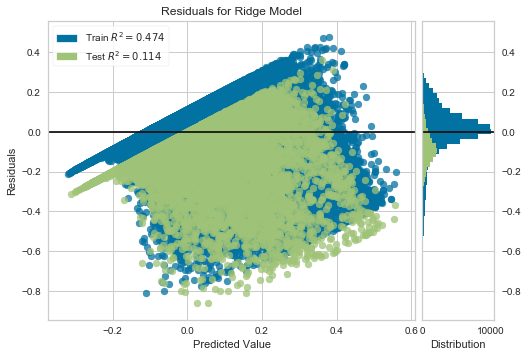

In [76]:
# Instantiate the Ridge model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

### Method 2: Creating a QSI model using the weighted averages columns with linear regression and Ridge regression

In [77]:
features_avg = [
 'Directness_ratio',
 'origin_presence',
 'dest_presence',
 'Aval_Seats_FC',
 'Avg_Circuity_time',
 'Aval_Flights_percent',
 'Aval_Seats_percent',
 'Dep_wgt_average',
 'Arr_wgt_average',
 'layover_wgt_average'
]

In [78]:
X = Q4[features_avg]
y = Q4['rev_percent']

In [79]:
# Make train/test splits of the right size.
X_train_and_validation, X_test, y_train_and_validation, y_test  =  train_test_split(X, y, test_size = 0.2, random_state = 6) # test set is 20%
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.1, random_state = 6) # validation set is 10% of the total data (not 10% of X_train_and_validation)
print(X_train.shape, X_val.shape, X_test.shape)

(78594, 10) (8733, 10) (17466, 10)


In [80]:
# use statsmodel to get a print out summary of the model similar to R
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            rev_percent   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     6292.
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        20:27:59   Log-Likelihood:                 47808.
No. Observations:               87327   AIC:                        -9.559e+04
Df Residuals:                   87316   BIC:                        -9.549e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0245 

C:\Users\annam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [81]:
# Use SKLearn to check the MSE
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
df = pd.DataFrame(y_test)
df['y_pred'] = y_pred

## mean square error
MSE = mean_squared_error(df['rev_percent'], df['y_pred'])

print(MSE)

0.018949457780489197


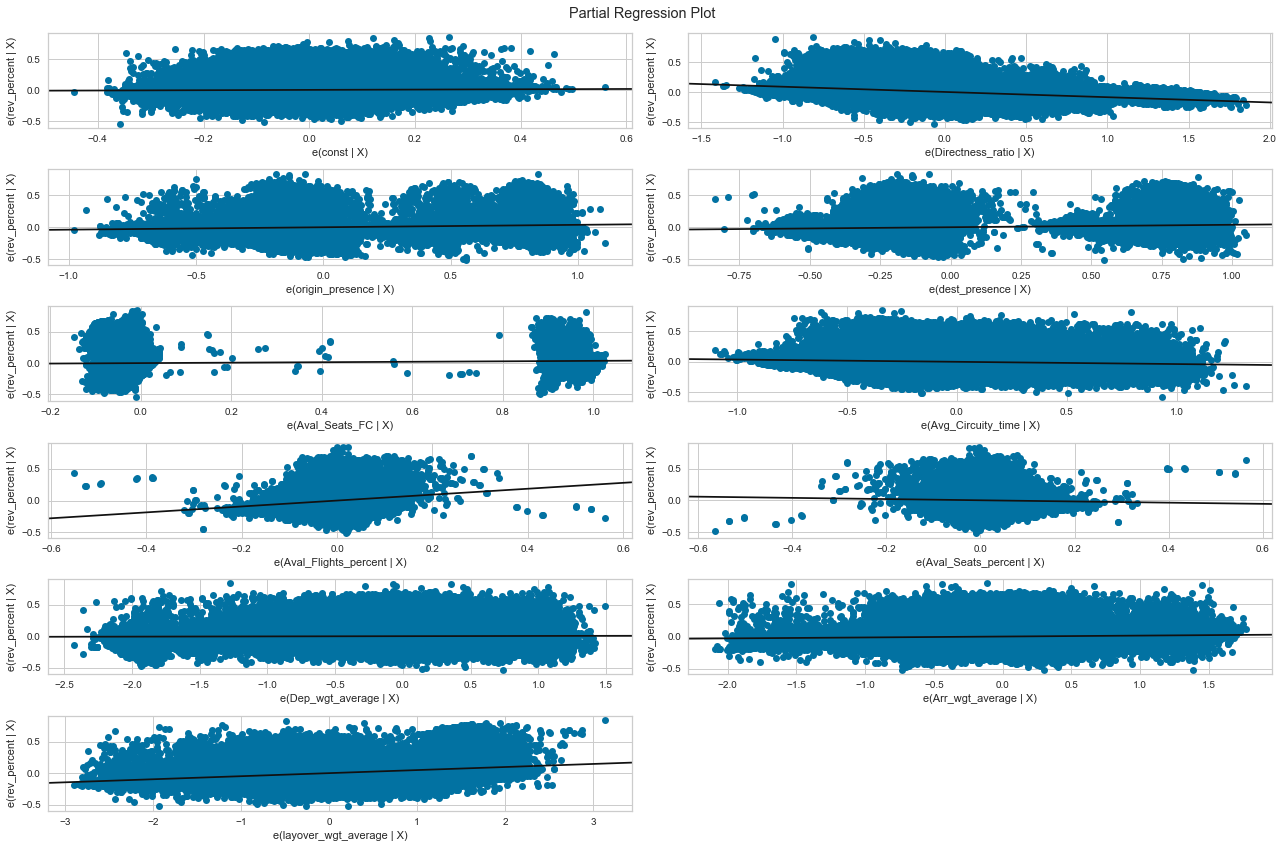

In [82]:
# look at the residual plots
fig = plt.figure(figsize=(18,12))
fig = sm.graphics.plot_partregress_grid(est2, fig=fig)

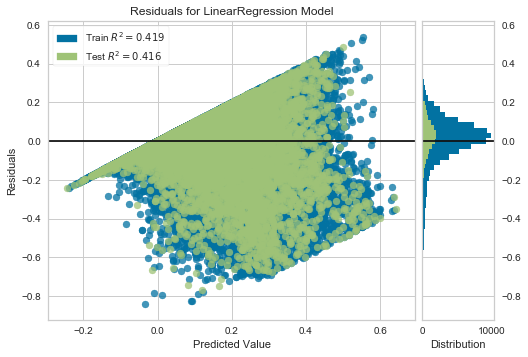

In [83]:
# Instantiate the Ridge model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

In [84]:
# Ridge models assume input features are standardized
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
y_train = y_train - np.mean(y_train)

X_test = scaler.transform(X_test)
y_test = y_test - np.mean(y_train)

X_val = scaler.transform(X_val)
y_val = y_val 

In [85]:
# Ridge regression
l2_penalties = np.logspace(-5, 5, 11)
ridge_data = []

for l2_penalty in l2_penalties:
    print(l2_penalty)
    model2 = Ridge(alpha = l2_penalty)

    rdg = model2.fit(X_train, y_train)
    y_train_predict = rdg.predict(X_train)
    y_val_predict = rdg.predict(X_val)

    train_error = mean_squared_error(y_train, y_train_predict) # TODO: compute MSE on the training set
    val_error = mean_squared_error(y_val, y_val_predict) # TODO: compute MSE on the validation set

    
    # We maintain a list of dictionaries containing our results
    ridge_data.append({
        'l2_penalty': l2_penalty,
        'model': rdg,
        'train_mse': train_error,
        'validation_mse': val_error})
    
ridge_data = pd.DataFrame(ridge_data) # We will put this data into a datframe to make it easier to use later.
print(ridge_data)

1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
      l2_penalty                                              model  \
0        0.00001  Ridge(alpha=1e-05, copy_X=True, fit_intercept=...   
1        0.00010  Ridge(alpha=0.0001, copy_X=True, fit_intercept...   
2        0.00100  Ridge(alpha=0.001, copy_X=True, fit_intercept=...   
3        0.01000  Ridge(alpha=0.01, copy_X=True, fit_intercept=T...   
4        0.10000  Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...   
5        1.00000  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...   
6       10.00000  Ridge(alpha=10.0, copy_X=True, fit_intercept=T...   
7      100.00000  Ridge(alpha=100.0, copy_X=True, fit_intercept=...   
8     1000.00000  Ridge(alpha=1000.0, copy_X=True, fit_intercept...   
9    10000.00000  Ridge(alpha=10000.0, copy_X=True, fit_intercep...   
10  100000.00000  Ridge(alpha=100000.0, copy_X=True, fit_interce...   

    train_mse  validation_mse  
0    0.019625        0.031252  
1    0.019625   

In [86]:
# sanity check
assert type(ridge_data) == pd.DataFrame
assert len(ridge_data) == 11

for col in ['l2_penalty', 'model', 'train_mse', 'validation_mse']:
    assert col in ridge_data.columns, f'Missing column {col}'

In [87]:
def print_coefficients(model, features):
    """
    This function takes in a model column and a features column. 
    And prints the coefficient along with its feature name.
    """
    feats = list(zip(model.coef_, features))
    print(*feats, sep = "\n")

In [88]:
# Reruning Ridge model using best l2-penalty value identified

index = ridge_data['validation_mse'].idxmin()

best_ridge = ridge_data.loc[index]

ridge_model = Ridge(alpha = best_ridge['l2_penalty']).fit(X_train, y_train)

y_predict2 = ridge_model.predict(X_test)
test_error2 = mean_squared_error(y_test, y_predict2)

print('Best L2 Penalty', best_ridge['l2_penalty'])
print('TEST MSE', test_error2)
print_coefficients(best_ridge['model'], features_percent)

Best L2 Penalty 1e-05
TEST MSE 0.030746971549445456
(-0.049692418697829, 'Directness_ratio')
(0.01642056427782399, 'origin_presence')
(0.01671273548412918, 'dest_presence')
(0.005727597765466752, 'Aval_Seats_FC')
(-0.016389556141235884, 'Avg_Circuity_time')
(0.09750922633107861, 'Aval_Flights_percent')
(-0.02041459192022356, 'Dep_Mrng_percent')
(0.0023909306725068743, 'Dep_Noon_percent')
(0.008737903929265432, 'Dep_Evening_percent')
(0.04735131063162396, 'Arr_Mrng_percent')


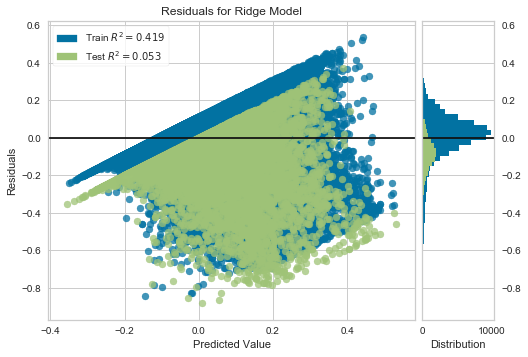

In [89]:
# Instantiate the Ridge model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

### Method 2b: transformed variables

In [90]:
features_transformed_avg = [
 'Directness_ratio_sq',
 'origin_presence',
 'dest_presence',
 'Avg_Circuity_time_sq',
 'Aval_Seats_FC',
 'Aval_Flights_percent_sqrt',
 'Dep_wgt_average_sq',
 'Arr_wgt_average_sq',
 'layover_wgt_average_sqrt'
]

X = Q4[features_transformed_avg]
y = Q4['rev_percent']

# Make train/test splits of the right size.
X_train_and_validation, X_test, y_train_and_validation, y_test  =  train_test_split(X, y, test_size = 0.2, random_state = 6) # test set is 20%
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.1, random_state = 6) # validation set is 10% of the total data (not 10% of X_train_and_validation)
print(X_train.shape, X_val.shape, X_test.shape)

(78594, 9) (8733, 9) (17466, 9)


In [91]:
# use statsmodel to get a print out summary of the model similar to R
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            rev_percent   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     6193.
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        20:28:14   Log-Likelihood:                 45668.
No. Observations:               87327   AIC:                        -9.132e+04
Df Residuals:                   87317   BIC:                        -9.122e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

C:\Users\annam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [92]:
# Use SKLearn to check the MSE
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
df = pd.DataFrame(y_test)
df['y_pred'] = y_pred

## mean square error
MSE = mean_squared_error(df['rev_percent'], df['y_pred'])

print(MSE)

0.019940526580289688


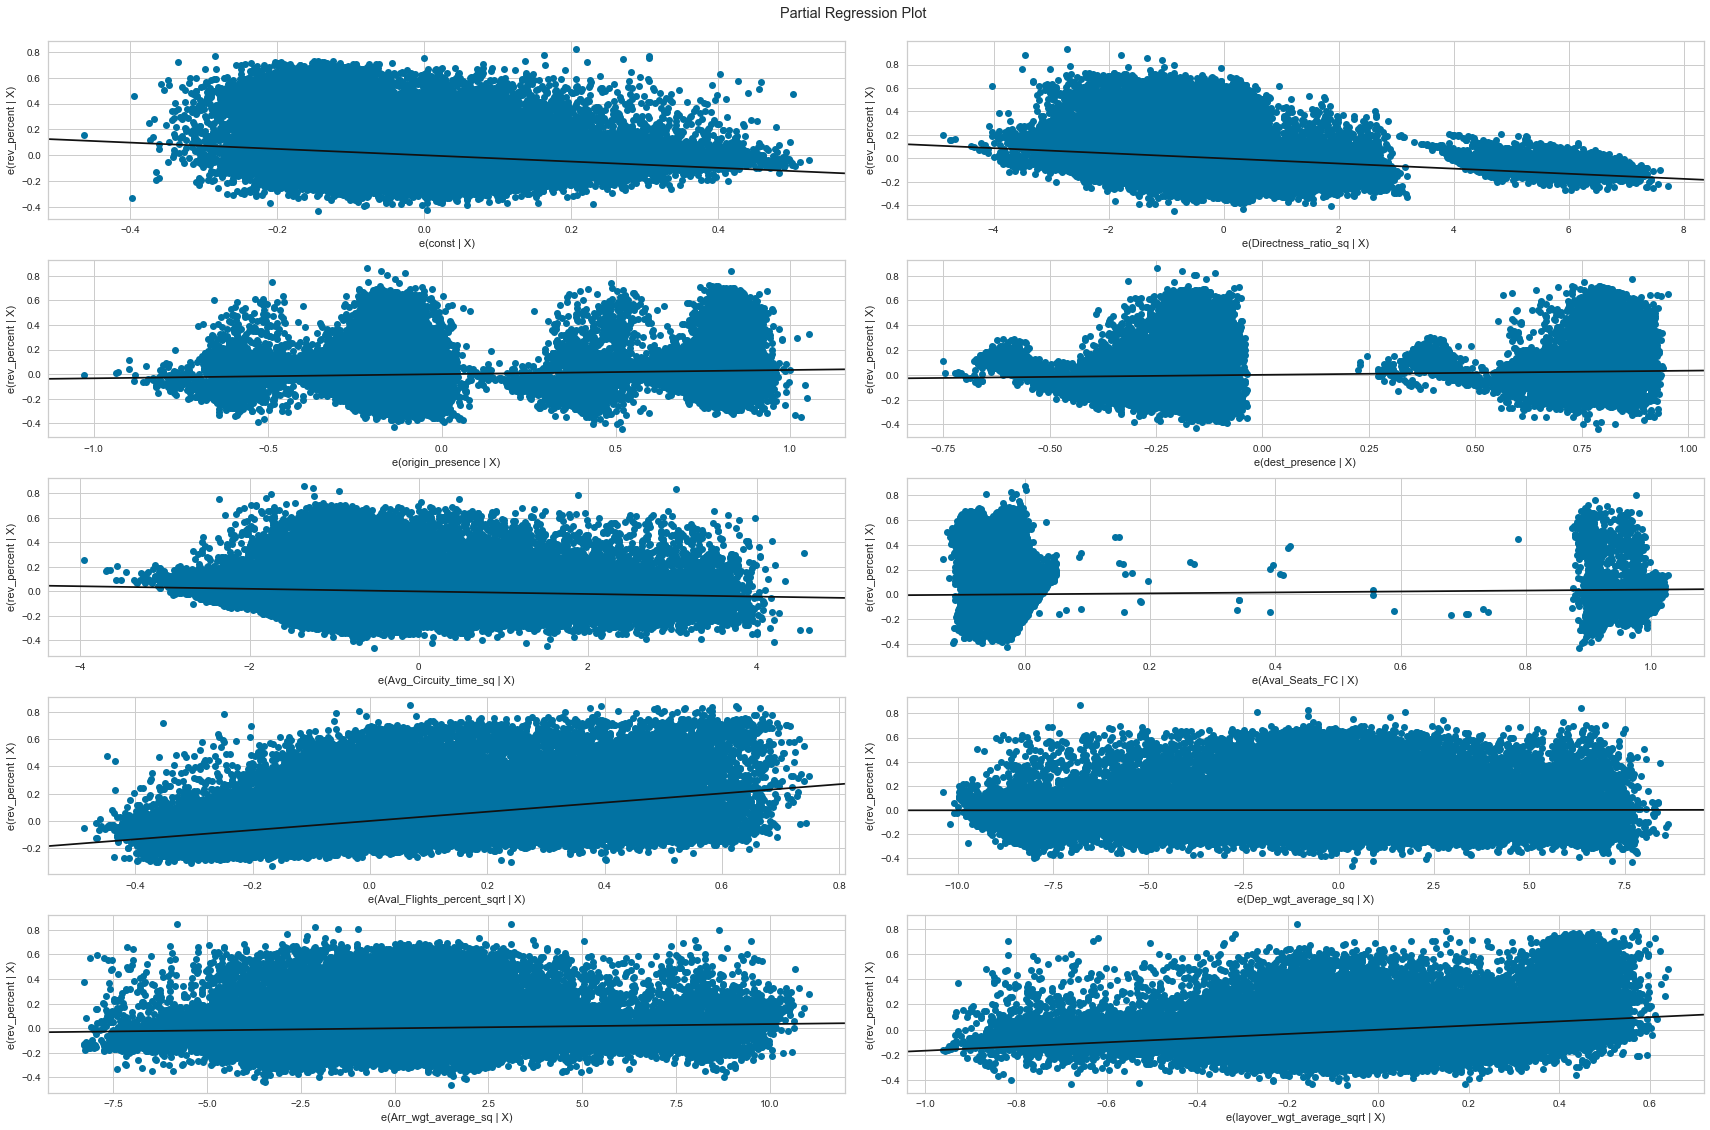

In [93]:
# look at the residual plots
fig = plt.figure(figsize=(24,16))
fig = sm.graphics.plot_partregress_grid(est2, fig=fig)

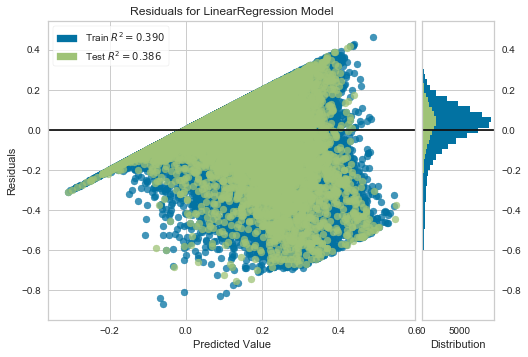

In [94]:
# Instantiate the Ridge model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

In [95]:
# Ridge models assume input features are standardized
# enough of the input variables have what appears to be an exponential distribution, so standardizing 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
y_train = y_train - np.mean(y_train)

X_test = scaler.transform(X_test)
y_test = y_test - np.mean(y_train)

X_val = scaler.transform(X_val)
y_val = y_val 

In [96]:
# Ridge regression
l2_penalties = np.logspace(-5, 5, 11)
ridge_data = []

for l2_penalty in l2_penalties:
    print(l2_penalty)
    model2 = Ridge(alpha = l2_penalty)

    rdg = model2.fit(X_train, y_train)
    y_train_predict = rdg.predict(X_train)
    y_val_predict = rdg.predict(X_val)

    train_error = mean_squared_error(y_train, y_train_predict) # TODO: compute MSE on the training set
    val_error = mean_squared_error(y_val, y_val_predict) # TODO: compute MSE on the validation set

    
    # We maintain a list of dictionaries containing our results
    ridge_data.append({
        'l2_penalty': l2_penalty,
        'model': rdg,
        'train_mse': train_error,
        'validation_mse': val_error})
    
ridge_data = pd.DataFrame(ridge_data) # We will put this data into a datframe to make it easier to use later.
print(ridge_data)

1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
      l2_penalty                                              model  \
0        0.00001  Ridge(alpha=1e-05, copy_X=True, fit_intercept=...   
1        0.00010  Ridge(alpha=0.0001, copy_X=True, fit_intercept...   
2        0.00100  Ridge(alpha=0.001, copy_X=True, fit_intercept=...   
3        0.01000  Ridge(alpha=0.01, copy_X=True, fit_intercept=T...   
4        0.10000  Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...   
5        1.00000  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...   
6       10.00000  Ridge(alpha=10.0, copy_X=True, fit_intercept=T...   
7      100.00000  Ridge(alpha=100.0, copy_X=True, fit_intercept=...   
8     1000.00000  Ridge(alpha=1000.0, copy_X=True, fit_intercept...   
9    10000.00000  Ridge(alpha=10000.0, copy_X=True, fit_intercep...   
10  100000.00000  Ridge(alpha=100000.0, copy_X=True, fit_interce...   

    train_mse  validation_mse  
0    0.020607        0.032172  
1    0.020607   

In [97]:
# Reruning Ridge model using best l2-penalty value identified

index = ridge_data['validation_mse'].idxmin()

best_ridge = ridge_data.loc[index]

ridge_model = Ridge(alpha = best_ridge['l2_penalty']).fit(X_train, y_train)

y_predict2 = ridge_model.predict(X_test)
test_error2 = mean_squared_error(y_test, y_predict2)

print('Best L2 Penalty', best_ridge['l2_penalty'])
print('TEST MSE', test_error2)
print_coefficients(best_ridge['model'], features_percent)

Best L2 Penalty 100.0
TEST MSE 0.03166875528515006
(-0.04416907285910677, 'Directness_ratio')
(0.014696061616389222, 'origin_presence')
(0.014531911913704636, 'dest_presence')
(-0.01617987999248745, 'Aval_Seats_FC')
(0.006006723329368524, 'Avg_Circuity_time')
(0.0777969260478927, 'Aval_Flights_percent')
(0.0005271083353087753, 'Dep_Mrng_percent')
(0.01104756622822958, 'Dep_Noon_percent')
(0.04627462420878392, 'Dep_Evening_percent')


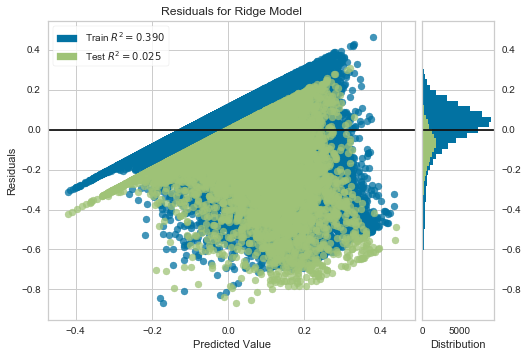

In [98]:
# Instantiate the Ridge model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

### Method 3: Using relative percentages for arrival and departure times and weighted average for layover level

In [99]:
features_combo = [
 'Directness_ratio',
 'origin_presence',
 'dest_presence',
 'Aval_Seats_FC',
 'Avg_Circuity_time',
 'Aval_Flights_percent',
 'Aval_Seats_percent',
 'Dep_Mrng_percent',
 'Dep_Noon_percent',
 'Dep_Evening_percent',
 'Dep_Midnight_percent',
 'Arr_Mrng_percent',
 'Arr_Noon_percent',
 'Arr_Evening_percent',
 'Arr_Midnight_percent',
 'layover_wgt_average'
]

In [100]:
X = Q4[features_combo]
y = Q4['rev_percent']

In [101]:
# Make train/test splits of the right size.
X_train_and_validation, X_test, y_train_and_validation, y_test  =  train_test_split(X, y, test_size = 0.2, random_state = 6) # test set is 20%
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.1, random_state = 6) # validation set is 10% of the total data (not 10% of X_train_and_validation)
print(X_train.shape, X_val.shape, X_test.shape)

(78594, 16) (8733, 16) (17466, 16)


In [102]:
# use statsmodel to get a print out summary of the model similar to R
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            rev_percent   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     4569.
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        20:28:24   Log-Likelihood:                 48111.
No. Observations:               87327   AIC:                        -9.619e+04
Df Residuals:                   87312   BIC:                        -9.605e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0492 

C:\Users\annam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [103]:
# Use SKLearn to check the MSE
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
df = pd.DataFrame(y_test)
df['y_pred'] = y_pred

## mean square error
MSE = mean_squared_error(df['rev_percent'], df['y_pred'])

print(MSE)

0.018805631671769928


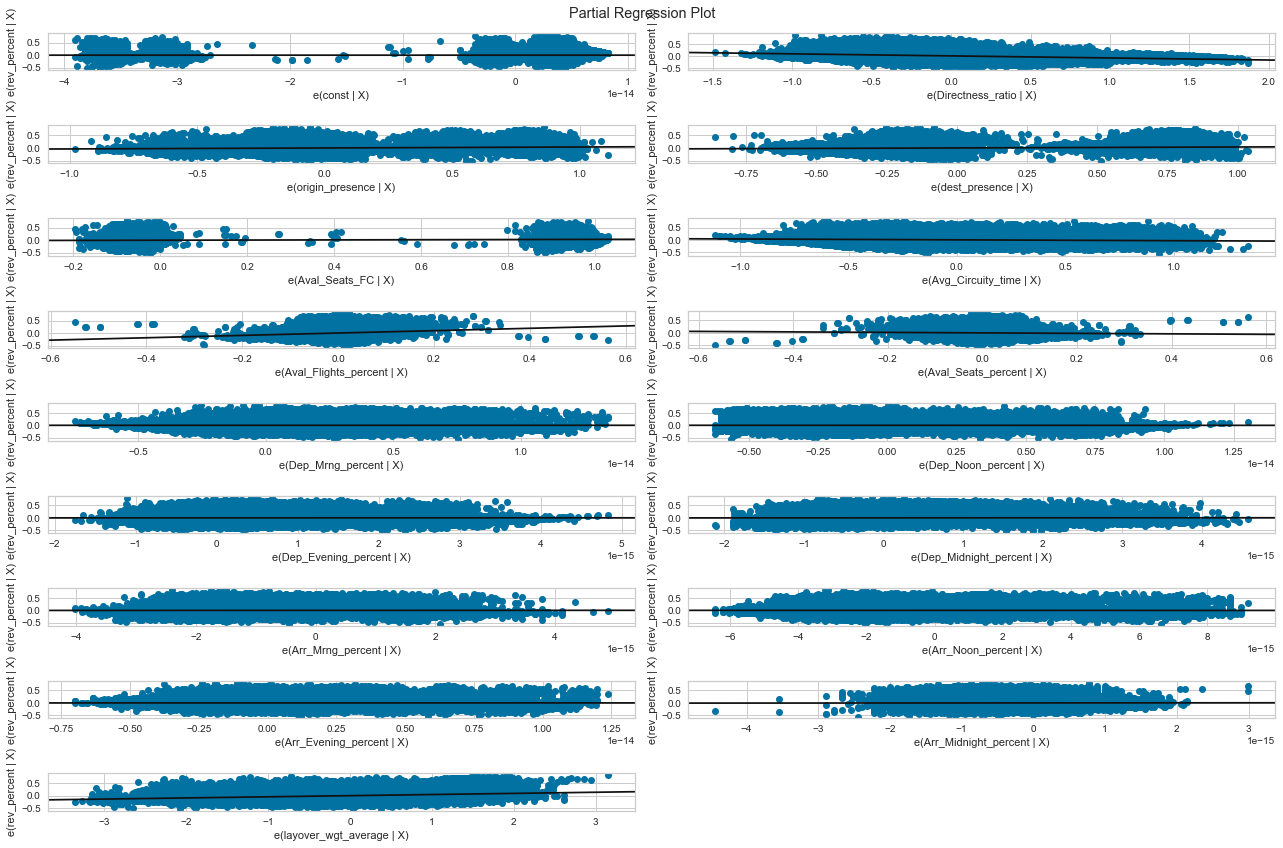

In [104]:
# look at the residual plots
fig = plt.figure(figsize=(18,12))
fig = sm.graphics.plot_partregress_grid(est2, fig=fig)

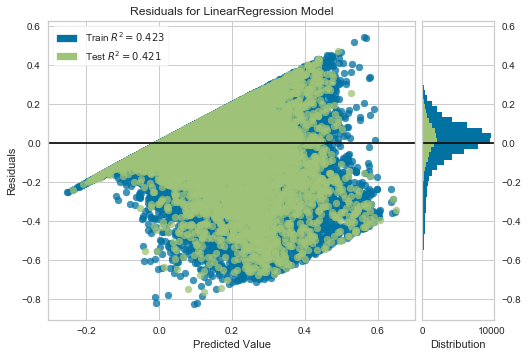

In [105]:
# Instantiate the Ridge model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [106]:
# Ridge models assume input features are standardized
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
y_train = y_train - np.mean(y_train)

X_test = scaler.transform(X_test)
y_test = y_test - np.mean(y_train)

X_val = scaler.transform(X_val)
y_val = y_val 

In [107]:
# Ridge regression
l2_penalties = np.logspace(-5, 5, 11)
ridge_data = []

for l2_penalty in l2_penalties:
    print(l2_penalty)
    model2 = Ridge(alpha = l2_penalty)

    rdg = model2.fit(X_train, y_train)
    y_train_predict = rdg.predict(X_train)
    y_val_predict = rdg.predict(X_val)

    train_error = mean_squared_error(y_train, y_train_predict) # TODO: compute MSE on the training set
    val_error = mean_squared_error(y_val, y_val_predict) # TODO: compute MSE on the validation set

    
    # We maintain a list of dictionaries containing our results
    ridge_data.append({
        'l2_penalty': l2_penalty,
        'model': rdg,
        'train_mse': train_error,
        'validation_mse': val_error})
    
ridge_data = pd.DataFrame(ridge_data) # We will put this data into a datframe to make it easier to use later.
print(ridge_data)

1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
      l2_penalty                                              model  \
0        0.00001  Ridge(alpha=1e-05, copy_X=True, fit_intercept=...   
1        0.00010  Ridge(alpha=0.0001, copy_X=True, fit_intercept...   
2        0.00100  Ridge(alpha=0.001, copy_X=True, fit_intercept=...   
3        0.01000  Ridge(alpha=0.01, copy_X=True, fit_intercept=T...   
4        0.10000  Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...   
5        1.00000  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...   
6       10.00000  Ridge(alpha=10.0, copy_X=True, fit_intercept=T...   
7      100.00000  Ridge(alpha=100.0, copy_X=True, fit_intercept=...   
8     1000.00000  Ridge(alpha=1000.0, copy_X=True, fit_intercept...   
9    10000.00000  Ridge(alpha=10000.0, copy_X=True, fit_intercep...   
10  100000.00000  Ridge(alpha=100000.0, copy_X=True, fit_interce...   

    train_mse  validation_mse  
0    0.019491        0.031070  
1    0.019491   

In [108]:
# sanity check
assert type(ridge_data) == pd.DataFrame
assert len(ridge_data) == 11

for col in ['l2_penalty', 'model', 'train_mse', 'validation_mse']:
    assert col in ridge_data.columns, f'Missing column {col}'

In [109]:
def print_coefficients(model, features):
    """
    This function takes in a model column and a features column. 
    And prints the coefficient along with its feature name.
    """
    feats = list(zip(model.coef_, features))
    print(*feats, sep = "\n")

In [110]:
# Reruning ridge model using best l2-penalty value identified

index = ridge_data['validation_mse'].idxmin()

best_ridge = ridge_data.loc[index]

ridge_model = Ridge(alpha = best_ridge['l2_penalty']).fit(X_train, y_train)

y_predict2 = ridge_model.predict(X_test)
test_error2 = mean_squared_error(y_test, y_predict2)

print('Best L2 Penalty', best_ridge['l2_penalty'])
print('TEST MSE', test_error2)
print_coefficients(best_ridge['model'], features_percent)

Best L2 Penalty 1e-05
TEST MSE 0.030600005096858268
(-0.04873684711985528, 'Directness_ratio')
(0.01663279696447431, 'origin_presence')
(0.016416540160150744, 'dest_presence')
(0.005356104738157242, 'Aval_Seats_FC')
(-0.015651731289819563, 'Avg_Circuity_time')
(0.09930291392487413, 'Aval_Flights_percent')
(-0.021088360762642713, 'Dep_Mrng_percent')
(-0.002020951011664516, 'Dep_Noon_percent')
(0.006067299150891589, 'Dep_Evening_percent')
(0.002528118810206951, 'Arr_Mrng_percent')
(-0.00838758301992137, 'Arr_Noon_percent')
(0.00901486709649083, 'Arr_Midnight_percent')
(0.002417633365371091, 'layover_lv0_percent')
(-0.007376169139578401, 'layover_lv1_percent')
(-0.002811321576451323, 'layover_lv2_percent')
(0.045136368652029475, 'layover_lv3_percent')


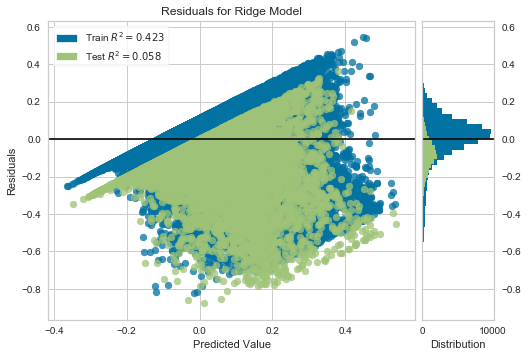

In [111]:
# Instantiate the Ridge model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

### Method 3b: transformed variables

In [112]:
features_transformed_combo = [
 'Directness_ratio_sq',
 'origin_presence',
 'dest_presence',
 'Avg_Circuity_time_sq',
 'Aval_Seats_FC',
 'Aval_Flights_percent',
 'Dep_Mrng_percent_sqrt',
 'Dep_Noon_percent_sqrt',
 'Dep_Evening_percent_sqrt',
 'Dep_Midnight_percent_sqrt',
 'Arr_Mrng_percent_sqrt',
 'Arr_Noon_percent_sqrt',
 'Arr_Evening_percent_sqrt',
 'Arr_Midnight_percent_sqrt',
 'layover_wgt_average_sq'
]

X = Q4[features_transformed_combo]
y = Q4['rev_percent']

# Make train/test splits of the right size.
X_train_and_validation, X_test, y_train_and_validation, y_test  =  train_test_split(X, y, test_size = 0.2, random_state = 6) # test set is 20%
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.1, random_state = 6) # validation set is 10% of the total data (not 10% of X_train_and_validation)
print(X_train.shape, X_val.shape, X_test.shape)

(78594, 15) (8733, 15) (17466, 15)


In [113]:
# use statsmodel to get a print out summary of the model similar to R
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

C:\Users\annam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:            rev_percent   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     4492.
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        20:28:39   Log-Likelihood:                 49085.
No. Observations:               87327   AIC:                        -9.814e+04
Df Residuals:                   87311   BIC:                        -9.799e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [114]:
# Use SKLearn to check the MSE
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
df = pd.DataFrame(y_test)
df['y_pred'] = y_pred

## mean square error
MSE = mean_squared_error(df['rev_percent'], df['y_pred'])

print(MSE)

0.01840716412557379


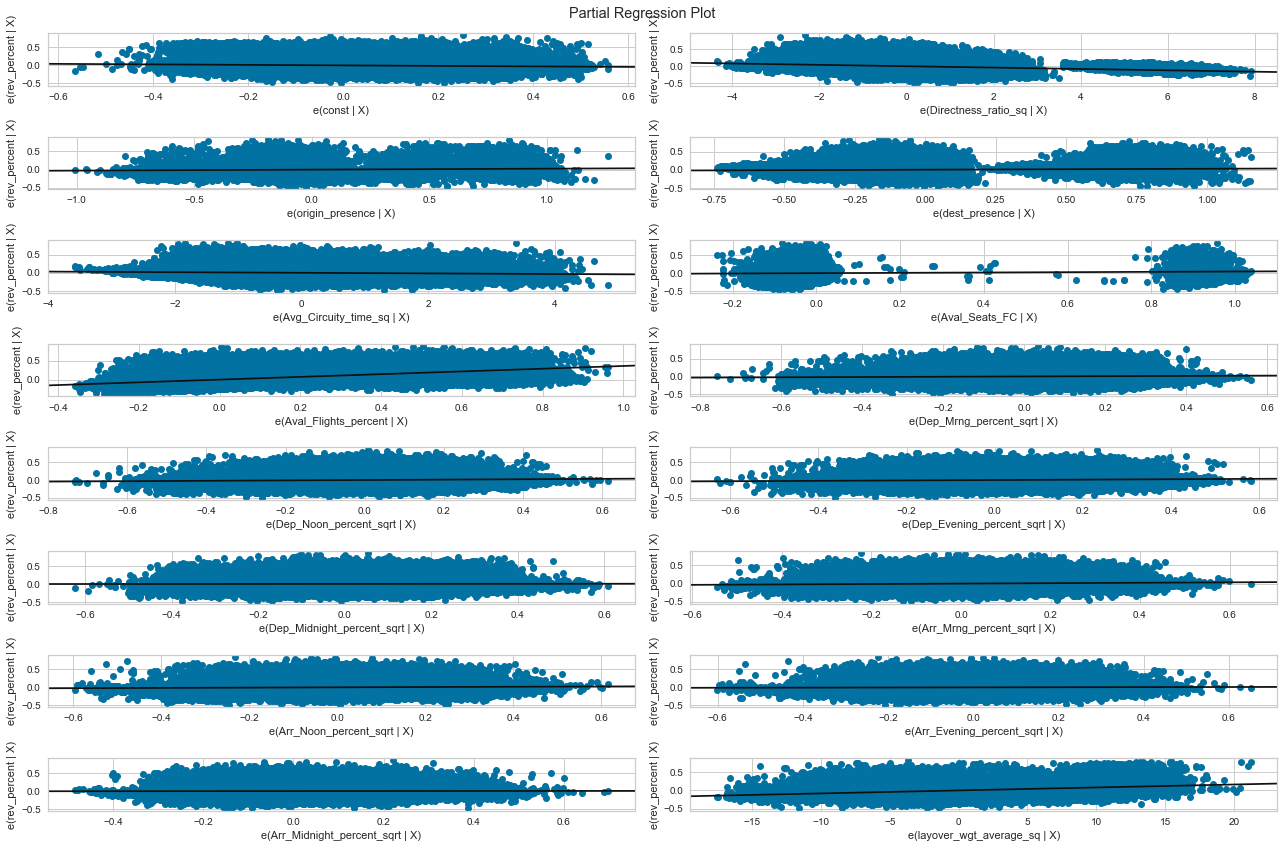

In [115]:
# look at the residual plots
fig = plt.figure(figsize=(18,12))
fig = sm.graphics.plot_partregress_grid(est2, fig=fig)

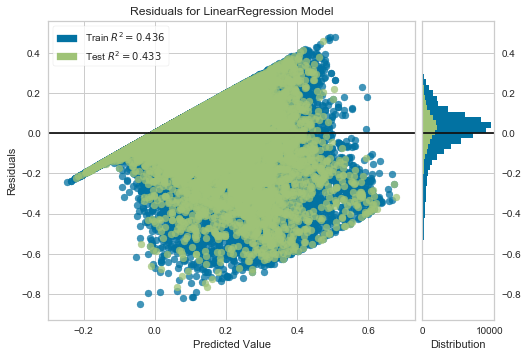

In [116]:
# Instantiate the Ridge model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [117]:
# Ridge models assume input features are standardized
# enough of the input variables have what appears to be an exponential distribution, so standardizing 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
y_train = y_train - np.mean(y_train)

X_test = scaler.transform(X_test)
y_test = y_test - np.mean(y_train)

X_val = scaler.transform(X_val)
y_val = y_val 

In [118]:
# Ridge regression
l2_penalties = np.logspace(-5, 5, 11)
ridge_data = []

for l2_penalty in l2_penalties:
    print(l2_penalty)
    model2 = Ridge(alpha = l2_penalty)

    rdg = model2.fit(X_train, y_train)
    y_train_predict = rdg.predict(X_train)
    y_val_predict = rdg.predict(X_val)

    train_error = mean_squared_error(y_train, y_train_predict) # TODO: compute MSE on the training set
    val_error = mean_squared_error(y_val, y_val_predict) # TODO: compute MSE on the validation set

    
    # We maintain a list of dictionaries containing our results
    ridge_data.append({
        'l2_penalty': l2_penalty,
        'model': rdg,
        'train_mse': train_error,
        'validation_mse': val_error})
    
ridge_data = pd.DataFrame(ridge_data) # We will put this data into a datframe to make it easier to use later.
print(ridge_data)

1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
      l2_penalty                                              model  \
0        0.00001  Ridge(alpha=1e-05, copy_X=True, fit_intercept=...   
1        0.00010  Ridge(alpha=0.0001, copy_X=True, fit_intercept...   
2        0.00100  Ridge(alpha=0.001, copy_X=True, fit_intercept=...   
3        0.01000  Ridge(alpha=0.01, copy_X=True, fit_intercept=T...   
4        0.10000  Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...   
5        1.00000  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...   
6       10.00000  Ridge(alpha=10.0, copy_X=True, fit_intercept=T...   
7      100.00000  Ridge(alpha=100.0, copy_X=True, fit_intercept=...   
8     1000.00000  Ridge(alpha=1000.0, copy_X=True, fit_intercept...   
9    10000.00000  Ridge(alpha=10000.0, copy_X=True, fit_intercep...   
10  100000.00000  Ridge(alpha=100000.0, copy_X=True, fit_interce...   

    train_mse  validation_mse  
0    0.019060        0.030522  
1    0.019060   

In [119]:
# Reruning ridge regression model using best l2-penalty value identified

index = ridge_data['validation_mse'].idxmin()

best_ridge = ridge_data.loc[index]

ridge_model = Ridge(alpha = best_ridge['l2_penalty']).fit(X_train, y_train)

y_predict2 = ridge_model.predict(X_test)
test_error2 = mean_squared_error(y_test, y_predict2)

print('Best L2 Penalty', best_ridge['l2_penalty'])
print('TEST MSE', test_error2)
print_coefficients(best_ridge['model'], features_percent)

Best L2 Penalty 1e-05
TEST MSE 0.030139246513870323
(-0.040147081081076855, 'Directness_ratio')
(0.01152691891389185, 'origin_presence')
(0.01101560165411393, 'dest_presence')
(-0.0127855028691149, 'Aval_Seats_FC')
(0.007271063100191907, 'Avg_Circuity_time')
(0.07506096444236164, 'Aval_Flights_percent')
(0.013949403910939491, 'Dep_Mrng_percent')
(0.020160002128748685, 'Dep_Noon_percent')
(0.016820944818683896, 'Dep_Evening_percent')
(0.002170324676194058, 'Arr_Mrng_percent')
(0.01731406574878877, 'Arr_Noon_percent')
(0.013952422975825537, 'Arr_Midnight_percent')
(0.006000771565776773, 'layover_lv0_percent')
(0.0014053324073258955, 'layover_lv1_percent')
(0.05369068707380187, 'layover_lv2_percent')


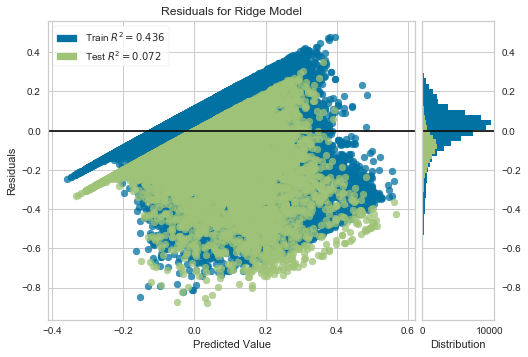

In [120]:
# Instantiate the Ridge model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

## Baseline: mean of %revenue
Evaluate models tested above against the baseline model that consists only of the average percentage of revenue

In [121]:
baseline = Q4['rev_percent'].mean()
baseline_pred = [baseline] * len(Q4['rev_percent'])
y = Q4['rev_percent']


In [122]:
MSE = np.square(np.subtract(y,baseline_pred)).mean()
#rmse = rmse(y, baseline_pred)
#MSE = rmse**2
#print(rmse)
print(MSE)

0.033704537932490196
